# Ley de Benford

La ley de Benford nos dice que el primer dígito de un numero de una serie de datos naturales tendría que tener una proporción de:
$$P(X = d) = log_{10} \left( 1 + \frac{1}{d} \right) = log_{10}(d+1) - log_{10}(d)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#np.linspace(1, 10, 10)

In [4]:
sns.set(style=('whitegrid' ), palette='plasma')

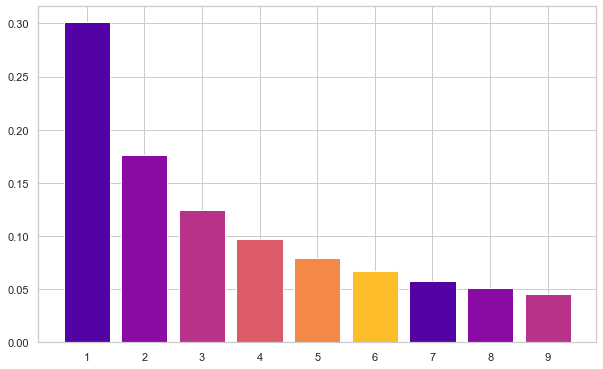

In [5]:
plt.figure(figsize = (10, 6.18))
for i in range(1,10):
    x = i
    y = np.log10(1 + 1/x)
    plt.bar(x, y)
plt.xticks(np.arange(1,10))
plt.show()

In [6]:
melate_data = pd.read_csv('/Users/emiliano/Downloads/Melate.csv')
melate_data = melate_data.iloc[::-1]
melate_data = melate_data.reset_index(drop=True)

In [7]:
melate_data.describe()

,NPRODUCTO,CONCURSO,R1,R2,R3,R4,R5,R6,R7,BOLSA
count,3376.0,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03
mean,40.0,1688.500000,7.048874,13.925948,21.202607,28.366706,35.470675,42.595083,25.056576,1.817955e+08
std,0.0,974.711581,5.830163,7.423995,8.610509,8.964820,8.709996,8.083664,14.556619,6.009706e+08
min,40.0,1.000000,1.000000,2.000000,3.000000,4.000000,10.000000,14.000000,1.000000,0.000000e+00
25%,40.0,844.750000,3.000000,8.000000,15.000000,22.000000,30.000000,37.000000,12.000000,9.000000e+06
50%,40.0,1688.500000,5.000000,13.000000,20.000000,28.000000,36.000000,43.000000,25.000000,3.150000e+07
75%,40.0,2532.250000,10.000000,18.000000,27.000000,34.000000,41.000000,49.000000,37.000000,1.240000e+08
max,40.0,3376.000000,42.000000,45.000000,52.000000,54.000000,55.000000,56.000000,56.000000,1.200000e+10


### Definimos la función que nos dará el primer dígito de los números

In [8]:
def benford(data):
    D1, D2, D3, D4, D5, D6, D7, D8, D9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(data)):
        first_number = [int(d) for d in str(data[i])][0]
        if first_number == 1:
            D1 += 1
        elif first_number == 2:
            D2 += 1
        elif first_number == 3:
            D3 += 1
        elif first_number == 4:
            D4 += 1
        elif first_number == 5:
            D5 += 1
        elif first_number == 6:
            D6 += 1
        elif first_number == 7:
            D7 += 1
        elif first_number == 8:
            D8 += 1
        elif first_number == 9:
            D9 += 1
    return np.array([D1, D2, D3, D4, D5, D6, D7, D8, D9])/len(data)

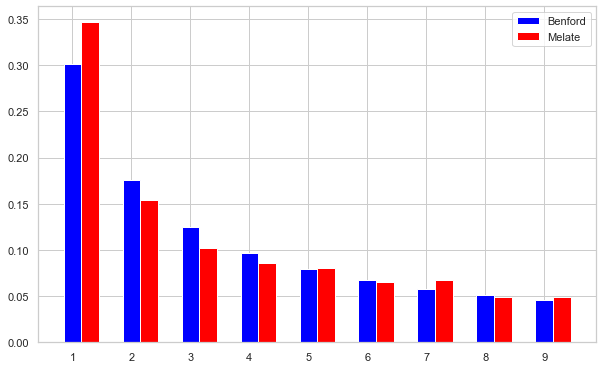

In [9]:
data = melate_data.R1
numbers = benford(data)

plt.figure(figsize = (10, 6.18))
barWidth = 0.3

x = np.arange(1,10)
y = numbers
y2 = np.log10(1 + 1/x)
r2 = [x2 + barWidth for x2 in x]
plt.bar(x, y2, color = 'b', alpha = 1, width=barWidth, label = 'Benford')
plt.bar(r2, y, color ='r', alpha = 1, width=barWidth, label = 'Melate')
plt.xticks(np.arange(1,10))
plt.legend(loc='best')
plt.show()

In [10]:
revancha_data = pd.read_csv('/Users/emiliano/Downloads/Revancha.csv')

In [11]:
revancha_data

,NPRODUCTO,CONCURSO,R1,R2,R3,R4,R5,R6,BOLSA,FECHA
0,41,3376,1,17,35,36,37,52,32200000,02/08/2020
1,41,3375,8,11,28,30,41,52,30800000,29/07/2020
2,41,3374,9,22,33,38,50,52,30700000,26/07/2020
3,41,3373,6,7,22,26,37,45,30600000,01/04/2020
4,41,3372,17,33,39,45,47,54,28200000,29/03/2020
...,...,...,...,...,...,...,...,...,...,...
2363,41,1013,8,11,14,19,21,34,3000000,20/08/1997
2364,41,1012,1,13,28,29,36,42,2000000,17/08/1997
2365,41,1011,4,10,15,18,26,39,3000000,13/08/1997
2366,41,1010,4,12,15,19,20,34,2000000,10/08/1997


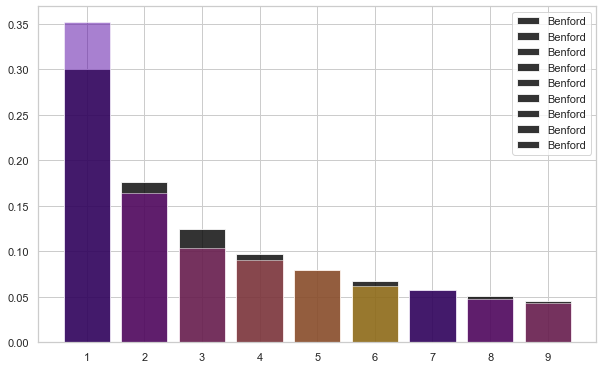

In [31]:
data = revancha_data.R1
numbers = benford(data)
plt.figure(figsize = (10, 6.18))
for i in range(1,10):
    x = i
    y = numbers[i-1]
    y2 = np.log10(1 + 1/x)
    plt.bar(x, y2, color = 'k', alpha = 0.8)
    plt.bar(x, y, alpha = 0.5)
plt.xticks(np.arange(1,10))
plt.show()

In [13]:
revanchita_data = pd.read_csv('/Users/emiliano/Downloads/Revanchita.csv')

In [14]:
revanchita_data

,NPRODUCTO,CONCURSO,F1,F2,F3,F4,F5,F6,BOLSA,FECHA
0,34,3376,1,4,5,10,11,43,51800000,02/08/2020
1,34,3375,13,14,28,36,39,52,50800000,29/07/2020
2,34,3374,17,20,31,49,50,51,50700000,26/07/2020
3,34,3373,8,14,30,35,47,52,50600000,01/04/2020
4,34,3372,6,7,30,35,43,54,49000000,29/03/2020
...,...,...,...,...,...,...,...,...,...,...
1001,34,2375,3,12,25,30,34,51,12500000,08/09/2010
1002,34,2374,7,14,18,38,43,47,12000000,05/09/2010
1003,34,2373,7,19,29,40,52,55,11500000,01/09/2010
1004,34,2372,1,13,23,31,32,48,11000000,29/08/2010


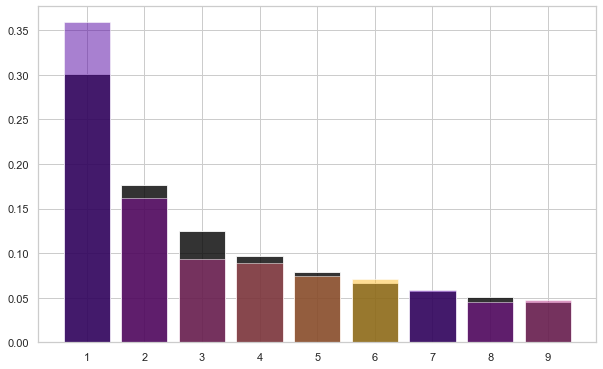

In [15]:
data = revanchita_data.F1
numbers = benford(data)
plt.figure(figsize = (10, 6.18))
for i in range(1,10):
    x = i
    y = numbers[i-1]
    y2 = np.log10(1 + 1/x)
    plt.bar(x, y2, color = 'k', alpha = 0.8)
    plt.bar(x, y, alpha = 0.5)
plt.xticks(np.arange(1,10))
plt.show()

# Comparemos con el Powerball

In [16]:
powerball = pd.read_csv('/Users/emiliano/Downloads/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')

In [17]:
powerball

,Draw Date,Winning Numbers,Multiplier
0,02/03/2010,17 22 36 37 52 24,2.0
1,02/06/2010,14 22 52 54 59 04,3.0
2,02/10/2010,05 08 29 37 38 34,5.0
3,02/13/2010,10 14 30 40 51 01,4.0
4,02/17/2010,07 08 19 26 36 15,3.0
...,...,...,...
1090,07/18/2020,13 16 32 58 59 09,2.0
1091,07/22/2020,16 25 36 44 55 14,3.0
1092,07/25/2020,05 21 36 61 62 18,2.0
1093,07/29/2020,07 29 35 40 45 26,2.0


In [18]:
powerball['Winning Numbers'][2].split(' ')[0].replace('0','')[0]

'5'

In [19]:
def benford_powerball(data):
    D1, D2, D3, D4, D5, D6, D7, D8, D9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(data)):
        first_number = int(data[i].split(' ')[0].replace('0','')[0])
        if first_number == 1:
            D1 += 1
        elif first_number == 2:
            D2 += 1
        elif first_number == 3:
            D3 += 1
        elif first_number == 4:
            D4 += 1
        elif first_number == 5:
            D5 += 1
        elif first_number == 6:
            D6 += 1
        elif first_number == 7:
            D7 += 1
        elif first_number == 8:
            D8 += 1
        elif first_number == 9:
            D9 += 1
    return np.array([D1, D2, D3, D4, D5, D6, D7, D8, D9])/len(data)

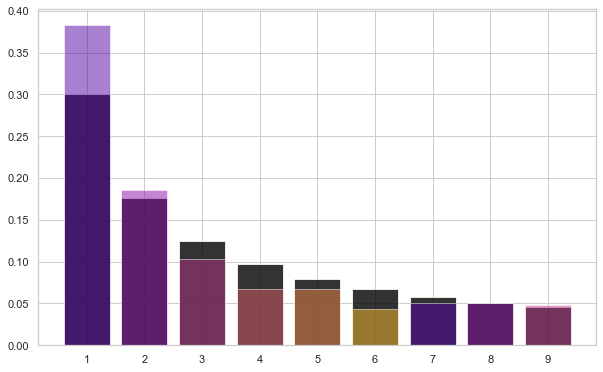

In [21]:
numbers = benford_powerball(powerball['Winning Numbers'])
plt.figure(figsize = (10, 6.18))
for i in range(1,10):
    x = i
    y = numbers[i-1]
    y2 = np.log10(1 + 1/x)
    plt.bar(x, y2, color = 'k', alpha = 0.8)
    plt.bar(x, y, alpha = 0.5)
plt.xticks(np.arange(1,10))
plt.show()

## Con el Tris

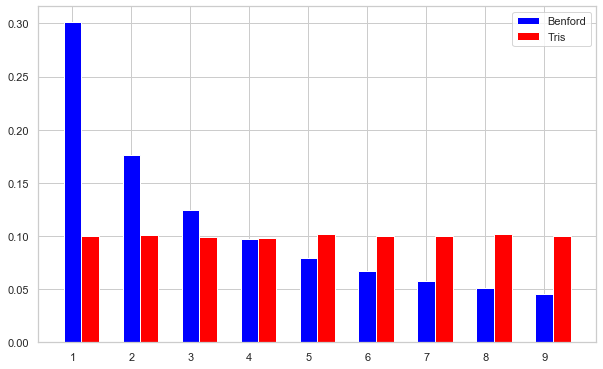

In [29]:
tris_data = pd.read_csv('/Users/emiliano/Downloads/Tris.csv')
data = tris_data.R1
numbers = benford(data)

plt.figure(figsize = (10, 6.18))
barWidth = 0.3

x = np.arange(1,10)
y = numbers
y2 = np.log10(1 + 1/x)
r2 = [x2 + barWidth for x2 in x]
plt.bar(x, y2, color = 'b', alpha = 1, width=barWidth, label = 'Benford')
plt.bar(r2, y, color ='r', alpha = 1, width=barWidth, label = 'Tris')
plt.xticks(np.arange(1,10))
plt.legend(loc='best')
plt.show()